## Exam I: CSCI4390-6390 (100 points)

This is a take-home exam. It is due 11:59:59pm on Monday, Oct 3 via submitty. You are expected to abide by the honor code, i.e., all work must be your own, and you are not allowed to discuss any aspect of exam with anyone except the TA or the professor. You are also not allowed to use the internet except to lookup numpy/python documentation, the book site, and class notes/videos. You must sign the declaration below that you will abide by the honor code.

#### **Honor Code Declaration**: Please sign with your name to acknowledge that you agree to abide by the honor code, and demonstrate the highest level of academic integrity.

Pranjal Jain

#### Download Dataset: Download the [Seeds Dataset](https://archive.ics.uci.edu/ml/datasets/seeds). It has 8 attributes, and 210 points. You need to ignore the last attribute, since it is the class variable, and we will not use it for our analysis. Store the dataset in your current directory and use "./seeds_dataset.txt" as its name. **DO NOT** submit the dataset as part of your answer on submitty.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./seeds_dataset.txt', sep="\t", header=None)
df = df[df.columns[0:7]]

n = df.shape[0]
d = df.shape[1]
df.head

<bound method NDFrame.head of          0      1       2      3      4      5      6
0    15.26  14.84  0.8710  5.763  3.312  2.221  5.220
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956
2    14.29  14.09  0.9050  5.291  3.337  2.699  4.825
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175
..     ...    ...     ...    ...    ...    ...    ...
205  12.19  13.20  0.8783  5.137  2.981  3.631  4.870
206  11.23  12.88  0.8511  5.140  2.795  4.325  5.003
207  13.20  13.66  0.8883  5.236  3.232  8.315  5.056
208  11.84  13.21  0.8521  5.175  2.836  3.598  5.044
209  12.30  13.34  0.8684  5.243  2.974  5.637  5.063

[210 rows x 7 columns]>

In [10]:
df.shape

(210, 8)

#### Q1. (20 points) Find the first two eigenvectors and eigenvalues using power-iteration. First set np.random.seed(42), and use np.random.random_sample to generate the random vectors. Set eps=1e-6 for convergence testing.

In [2]:
np.random.seed(42)
def norm(u):
    return np.sqrt(np.sum(u**2))

def unit(u):
    return u/norm(u)
    
def generate_u():
    return np.random.random_sample(33)

def orth_proj_uj(uj,ai):
    return (np.dot(uj,ai) / (norm(uj)**2)) * uj

def sub_proj(mat):
    for i in range(1,len(mat[0,:])):
        total_orth_proj=0
        for j in range(i):
            total_orth_proj += orth_proj_uj(mat[:,j],mat[:,i])
        mat[:,i] = mat[:,i] - total_orth_proj
    return(mat)

def unit_mat(mat):
    for i in range(0,len(mat[0,:])):
        mat[:,i] = unit(mat[:,i])
    return(mat)

def norm_sq(u):
    return np.sum(u**2)


rd = np.random.rand(d,2)
ei_val= np.zeros(2)
x0 = np.zeros([d,2])
for i in range(0,2):
    x0[:,i] = unit(rd[:,i])
err = 1e-6
diff= 1
itr =0
cov = np.cov(df.T)
'''
take dot product, then projection,find eigen values, then normalizatiion'''
while diff>err:
        itr+=1
        xn = x0.copy()
        xn1 =  np.dot(cov,xn)
        xn1 = sub_proj(xn1)
        for i in range(2):
            idx = np.argmax(xn1[:,i])
            if xn[idx,i] !=0:
               ei_val[i]= xn1[idx,i]/xn[idx,i]
            else: ei_val[i]=0
        
        xn1 = unit_mat(xn1)        
        
   
        diff = np.linalg.norm(xn1-xn)
        print('iteration:',itr,' ', 'diff',diff)
        x0 = xn1
print('=========================eigen values============================')
print(ei_val)
print('==========================eigen vectors===========================')
print(x0)

iteration: 1   diff 1.281497811192159
iteration: 2   diff 0.13130768957634786
iteration: 3   diff 0.024416571863379182
iteration: 4   diff 0.004697657417957365
iteration: 5   diff 0.0009270333059796078
iteration: 6   diff 0.00018702919741700547
iteration: 7   diff 3.841103192414055e-05
iteration: 8   diff 7.994755427461852e-06
iteration: 9   diff 1.679886065007759e-06
iteration: 10   diff 3.552840332586026e-07
=========================eigen values============================
[10.8883256   2.33107087]
==========================eigen vectors===========================
[[ 0.87958264  0.12611596]
 [ 0.39315205  0.06887439]
 [ 0.00434851 -0.00319107]
 [ 0.12761235  0.03593196]
 [ 0.11073223  0.00308242]
 [-0.13345659  0.93113428]
 [ 0.12704994  0.09493435]
 [-0.09616677  0.31940056]]


#### Q2. (10 points) Plot the two eigenvectors: Plot the original (uncentered) data using the first two original dimensions, and then show the projection of the two eigenvectors on that original 2D subspace. Use red for the 1st PC, and blue for 2nd PC. What do you observe. Explain.

Text(0.5, 1.0, 'Plot of original data using first 2 dimensions')

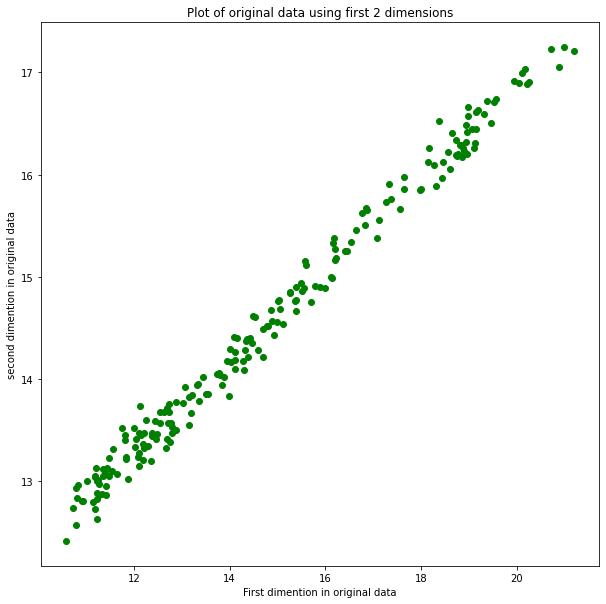

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(df[:][0], df[:][1], c="green")
plt.xlabel('First dimention in original data')
plt.ylabel('second dimention in original data')
plt.title('Plot of original data using first 2 dimensions')

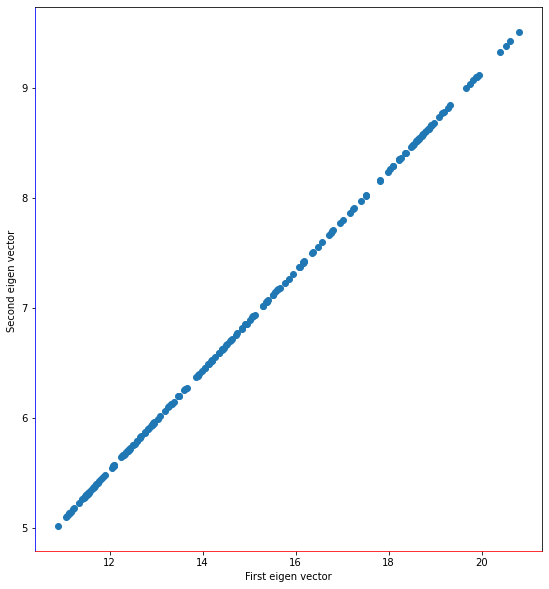

In [4]:
xf = x0[:,:2]
dff = np.array(df)
dff = dff[:,:2]
df_f = np.dot(dff,xf.T)
df_f.shape
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(121)

ax.set_xlabel('First eigen vector')
ax.set_ylabel('Second eigen vector ')

ax.spines['left'].set_color('blue')     
ax.spines['bottom'].set_color('red')         

ax.scatter(df_f[:,0],df_f[:,1])

The first plot shows the first 2 dimensions of the original data. the second plot shows the first 2 dimensions of original data projected on the
1st and the 2nd eigen vectors. The eigen vectors are the axises with capture the most variance. the first plot shows the points in one direction but they are scattered compared to the second plot, it is clear from looking at the two plots that the eigen vectors have capture the variance most of the variance and hence the points are almost on a single line.

#### Q3. (**CSCI6390 Only**: 10 points) PC as Linear Combination: Since all directions are linear combinations of the points, express the first eigenvector as a linear combinations of the original data points. That is, compute the point-wise weights, and print out the weight vector as a histogram with bins=100. Also print the weights for the first 10 points.

(210,)


(array([1., 0., 1., 0., 2., 2., 1., 1., 1., 1., 2., 1., 3., 1., 1., 1., 2.,
        3., 5., 3., 0., 5., 1., 2., 4., 1., 5., 2., 1., 2., 3., 4., 3., 6.,
        6., 2., 3., 4., 2., 4., 5., 2., 5., 4., 5., 1., 4., 4., 3., 4., 8.,
        3., 4., 4., 5., 4., 4., 2., 3., 4., 5., 0., 3., 4., 1., 1., 2., 1.,
        0., 5., 0., 3., 1., 3., 0., 0., 2., 0., 0., 1., 0., 1., 2., 0., 1.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([ 4.40951056,  4.485663  ,  4.56181544,  4.63796788,  4.71412032,
         4.79027276,  4.8664252 ,  4.94257763,  5.01873007,  5.09488251,
         5.17103495,  5.24718739,  5.32333983,  5.39949227,  5.4756447 ,
         5.55179714,  5.62794958,  5.70410202,  5.78025446,  5.8564069 ,
         5.93255934,  6.00871177,  6.08486421,  6.16101665,  6.23716909,
         6.31332153,  6.38947397,  6.46562641,  6.54177884,  6.61793128,
         6.69408372,  6.77023616,  6.8463886 ,  6.92254104,  6.99869347,
         7.07484591,  7.15099835,  7.22

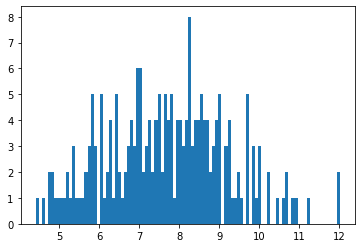

In [5]:
l1 = x0[:,1]
a = np.dot(df,l1.T)
print(a.shape)

plt.hist(a,bins=100)

#### Q4. (20 points) Kernel PCA: Using the homogeneous quadratic kernel,  find the kernel PCs. How many dimensions does it take so that fraction of  approximation error does not exceed 0.001? Plot the points onto the first two kernel PCs.

(210, 210)
vectors required for capturing 0.999 variance :  5
eigen values:  [21346.75631327  2445.25660851]


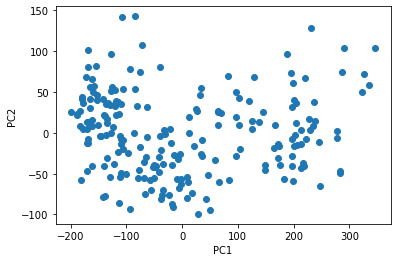

In [6]:
alpha = 1-0.001
I=np.eye(210) 
O=np.ones([n,n])/n
i_o = I-O
k = np.dot(df,df.T)
k = (k)**2
k = np.dot(i_o,np.dot(k,i_o)) #step 2
l,u = np.linalg.eigh(k)
l = l[::-1] #fliping eigen values array
u = np.flip(u, axis=1) #fliping eigen vectors array
li = l/n #step 5
print(u.shape)

t_var = np.sum(li)

total = 0
for i in range(0,len(li)): #step 7 & 8
    if total>=alpha:
        vnum = i
        break
    else:
        total+=li[i]/t_var
print('vectors required for capturing 0.999 variance : ',vnum)

el = li[0:2]
print('eigen values: ', el)
eu = u[:,0:2]

ui = eu/np.sqrt(n*el) #step 6 & 9
projd = np.dot(k,ui) #step 10

def plot_d(d):

    plt.scatter(d[:, 0], d[:, 1])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
plot_d(projd)

#### Q5 (20 points) Non-linear direction in input space: For the polynomial kernel it is actually possible to compute the direction of the kernel principal component. For the homogeneous quadratic kernel, compute the best quadratic PC direction equation.

#### Q6. (20 points) Points in high dimensional spheres: Generate $n=10,000$ points in a $d$-dimensional hypersphere with radius $r=1+\epsilon$, where $\epsilon=0.1$ is some small value. Plot the fraction of the points that lie within the unit hypersphere for various values of $d$ from $d=2$ to $d=30$. Explain the findings. Follow the steps below to generate the points, and make sure to plot them in 2D and 3D.

To generate points uniformly in a $d$-dimensional hypersphere with radius $r$, first set np.random.seed(42), and then do the following: First draw a random sample $Y$ from the standard multivariate normal distribution in $d$ dimensions (use np.random.multivariate_normal). Next, normalize $Y$ to get $S = Y / ||Y||$ (which can be shown to have a uniform distribution on the unit $d$-sphere). Next, multiply $S$ by $U^{1/d}$, that is, the $d$-th root of $U$, where $U$ is a random sample drawn from the uniform distribution on the unit interval $[0,1)$ (use np.random.uniform). This can be shown to create a uniform distribution of $d$-dimensional points within the unit $d$-dimensional hyperball. **Show the plot of the random points in 2D and 3D balls**. Make sure the points are uniformly distributed.

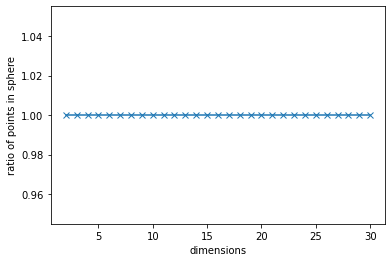

In [7]:
np.random.seed(42)
'''
np.random.multivariate_normal
normalze 𝑆=𝑌/||𝑌||
u = np.random.uniform
s*(u**1/d)
mean = np.zeros(d)
'''
e = 0.1
np.random.seed(42)
ratio=[]
n=10000
for i in range(2,31):
    mat = np.eye(i)
    mean = np.zeros(i)
    y = np.random.multivariate_normal(mean, mat, n)
    s = y/np.linalg.norm(y)
    u=np.random.uniform(low=0, high=1, size=(n,1))
    z = (s*(1.1*(u**1/i)))
    #print(z)
    nv = np.sum(z*z, axis=1)
    #nv = np.linalg.norm(z,axis=0)
    #print(nv)
    tru = nv[nv <= 1.1 ]
    ratio.append(tru.shape[0]/n)
    
dims = np.arange(2, 31)
plt.plot(dims,ratio, marker='x')
plt.xlabel('dimensions')
plt.ylabel('ratio of points in sphere')
plt.show()


(10000, 2)
[[ 1.18464944e-03  5.53341566e-04]
 [-7.60633279e-05 -2.44893669e-05]
 [ 2.65502153e-05  1.07636611e-04]
 ...
 [-2.05837235e-04 -1.35539874e-04]
 [-4.33894038e-04  6.45193921e-04]
 [-1.20308380e-05 -1.37847080e-05]]


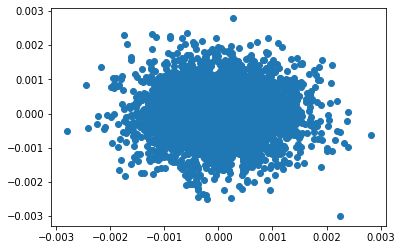

In [8]:

mat = np.eye(2)
mean = np.zeros(2)
y = np.random.multivariate_normal(mean, mat, n)
s = y/np.linalg.norm(y)
print(s.shape)
u=np.random.uniform(low=0, high=1, size=(n,1))
z = s*(u**1/d)
print(z)
plt.scatter(z[:,0],z[:,1])


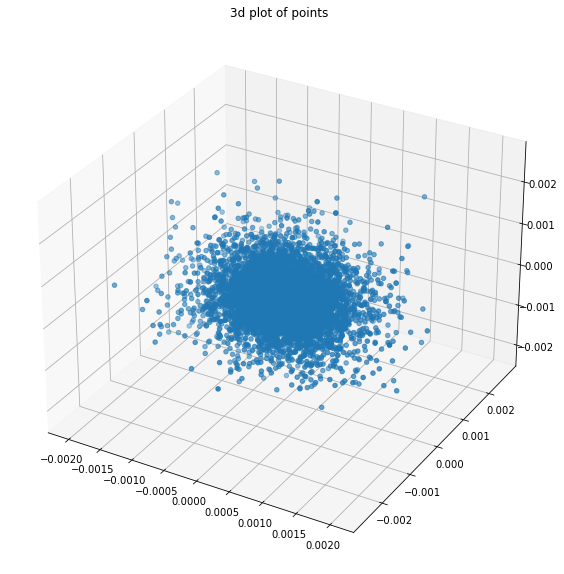

In [9]:
mat = np.eye(3)
mean = np.zeros(3)
y = np.random.multivariate_normal(mean, mat, n)
s = y/np.linalg.norm(y)
u=np.random.uniform(low=0, high=1, size=(n,1))
z = s*(u**1/d)
plt.figure(figsize=(10,10))
plt.axes(projection='3d').scatter3D(z[:,0],z[:,1],z[:,2])
plt.title('3d plot of points')
plt.show()

#### Q7. (10 points) Prove or Disprove: $\bar{X}^T Y = \bar{X}^T \bar{Y}$. Here $X$ and $Y$ are two attribute vectors, and $\bar{X}$ and $\bar{Y}$ are their centered counterparts.

(You may type your answer in latex via markdown, i.e., enclose math with '$' signs, or you may attach a figure. To attach a figure, just drag and drop an image in the "markdown" cell below.)

let x = [2,4] & y = [4,8] 
mean_x = 3 & mean_y = 6 
x_bar = [-1,1] & y_bar = [-2,2] 
to prove  x_bar.T y = x_bar.T y_bar 
dot product of x_bar.T & y =  [-1,1] [4,8] => 4 
dot product of x_bar.T & y_bar =  [-1,1] [-2,2] => 4

Hence, x_bar.T & y = x_bar.T & y_bar

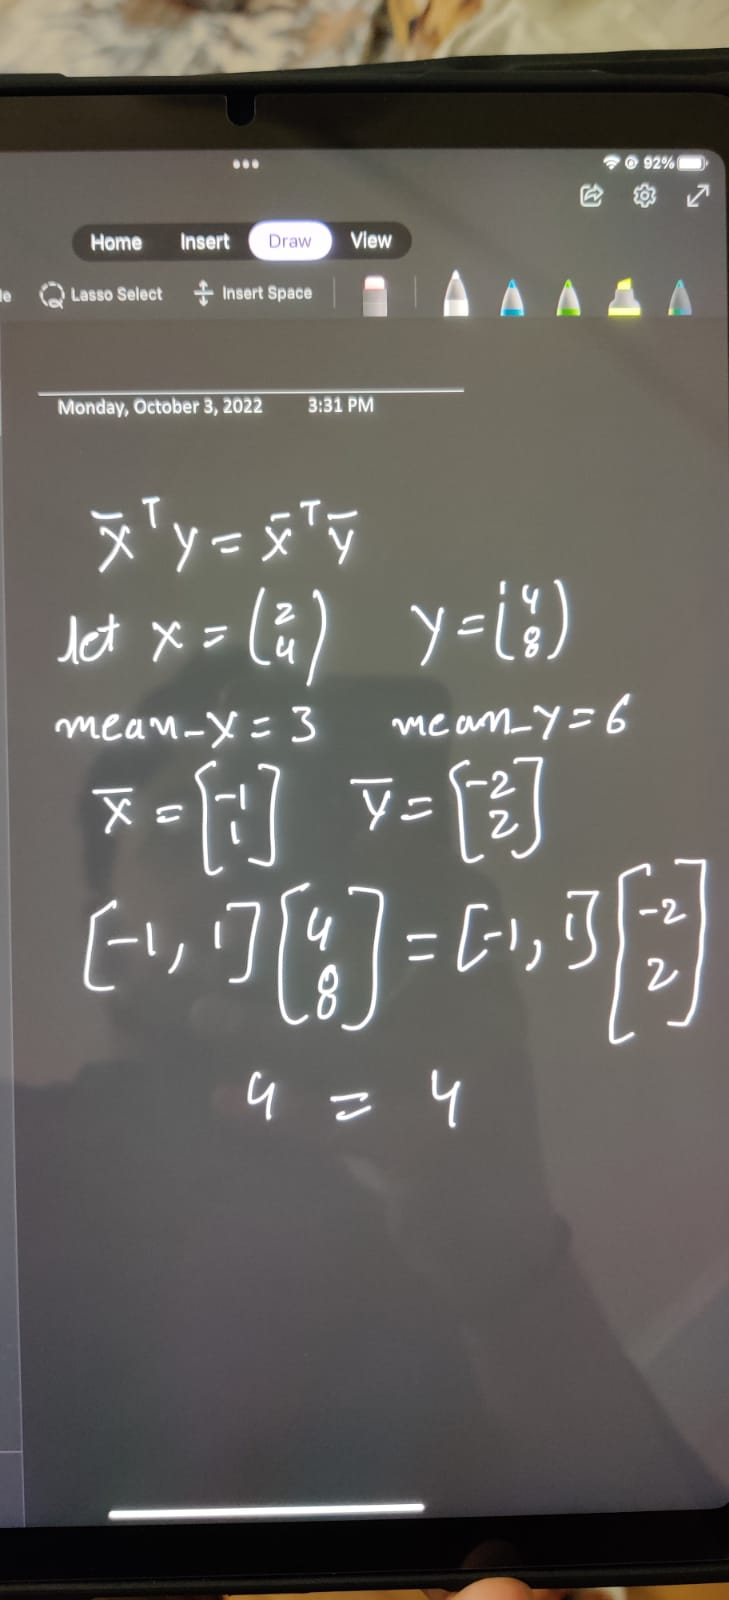

#### Q8 (**CSCI 6390 Only**: 10 points) Let $\mathbf{a}$ be random $d$-dimensional binary vector, and $\mathbf{b}$ a random $d$-dimensional corner in a $d$-dimensional unit hypercube (with the range in each axis as $[0,1]$). Derive the formula for the expected angle between $\mathbf{a}$ and $\mathbf{b}$? 

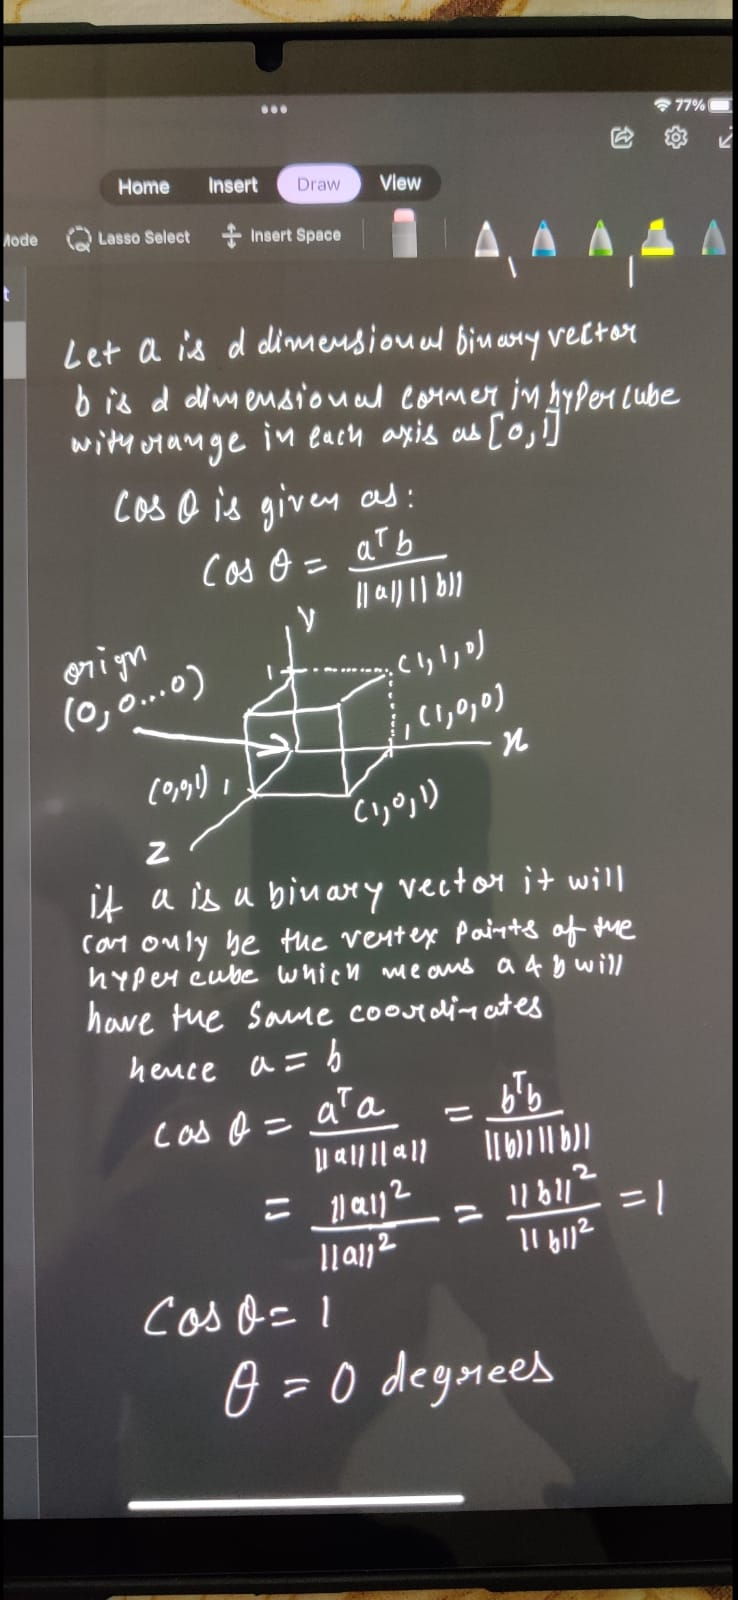